#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [54]:
import pandas as pd
df = pd.read_csv("imdb_top_10000.txt", sep="\t", names=["imdbID","title","year","score","votes","runtime","genres"])

In [55]:
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [56]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [57]:
df.shape

(10000, 7)

In [58]:
df.dropna(subset=["genres"], inplace=True)
df.shape

(9999, 7)

In [59]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

In which year does the rating of the movie is highest and lowest?

How can you say that the particular movie is famous? show the highest vote got by movie.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [60]:
rt = df.runtime[0]
rt

'142 mins.'

In [69]:
runtime = rt.split("mins")[0]
runtime

'142 '

In [62]:
def runt(rt):
    runtime = rt.split("mins")[0]
    return runtime


df["runtime_in_mins"] = df.runtime.map(runt)
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres runtime_in_mins  
0                       Crime|Drama            142   
1                    Crime|Thriller            154   
2            Drama|Mystery|Thriller            139   
3           Action|Adventure|Sci-Fi            136   
4  Action|Adventure|Sci-Fi|Thriller            148

In [65]:
df.drop(["runtime"], axis=1, inplace=True)
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

                                genres runtime_in_mins  
0                          Crime|Drama            142   
1                       Crime|Thriller            154   
2               Drama|Mystery|Thriller            139   
3              Action|Adventure|Sci-Fi            136   
4     Action|Adventure|Sci-Fi|Thriller            148   
...                                ...             ...  
9995                             Drama             78   
9996        Comedy|Drama|Music|Romance            100   
9997            Drama|Mystery|Thriller            104   
9998                   Musical|Romance            179   
9999                      Comedy|Drama             96   

[9999 rows x 7 columns]

In [67]:
df.runtime_in_mins = df.runtime_in_mins.astype("int")
df.dtypes

imdbID              object
title               object
year                 int64
score              float64
votes                int64
genres              object
runtime_in_mins      int32
dtype: object

In [75]:
set_genre = set()

In [78]:
for genres in df.genres:
    set_genre.update(genres.split("|"))
len(set_genre)    

24

In [82]:
for genres in set_genre:
    df[genres] = [genres in row.split("|") for row in df.genres]

In [83]:
genredf = df[list(set_genre)]
genredf.head()

Sport  Drama  Adult  Romance  Mystery  Action  History  Reality-TV   News  \
0  False   True  False    False    False   False    False       False  False   
1  False  False  False    False    False   False    False       False  False   
2  False   True  False    False     True   False    False       False  False   
3  False  False  False    False    False    True    False       False  False   
4  False  False  False    False    False    True    False       False  False   

   Musical  ...  Thriller  Western  Animation  Fantasy  Sci-Fi    War  Family  \
0    False  ...     False    False      False    False   False  False   False   
1    False  ...      True    False      False    False   False  False   False   
2    False  ...      True    False      False    False   False  False   False   
3    False  ...     False    False      False    False    True  False   False   
4    False  ...      True    False      False    False    True  False   False   

   Adventure  Comedy  Film-Noir  
0      False   False      False  
1      False   False      False  
2      False   False      False  
3       True   False      False  
4       True   False      False  

[5 rows x 24 columns]

In [85]:
name = df.title[0]
name

'The Shawshank Redemption (1994)'

In [88]:
titlen = name.split(" (")[0]
titlen

'The Shawshank Redemption'

In [89]:
def title_name(name):
    titlen = name.split(" (")[0]
    return titlen

df["title"] = df.title.map(title_name)
df.head()

imdbID                     title  year  score   votes  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479   
1  tt0110912              Pulp Fiction  1994    9.0  490065   
2  tt0137523                Fight Club  1999    8.8  458173   
3  tt0133093                The Matrix  1999    8.7  448114   
4  tt1375666                 Inception  2010    8.9  385149   

                             genres  runtime_in_mins  Comedy|Drama  Sport  \
0                       Crime|Drama              142         False  False   
1                    Crime|Thriller              154         False  False   
2            Drama|Mystery|Thriller              139         False  False   
3           Action|Adventure|Sci-Fi              136         False  False   
4  Action|Adventure|Sci-Fi|Thriller              148         False  False   

   Drama  ...  Thriller  Western  Animation  Fantasy  Sci-Fi    War  Family  \
0   True  ...     False    False      False    False   False  False   False   
1  False  ...      True    False      False    False   False  False   False   
2   True  ...      True    False      False    False   False  False   False   
3  False  ...     False    False      False    False    True  False   False   
4  False  ...      True    False      False    False    True  False   False   

   Adventure  Comedy  Film-Noir  
0      False   False      False  
1      False   False      False  
2      False   False      False  
3       True   False      False  
4       True   False      False  

[5 rows x 32 columns]

## 4. EDA

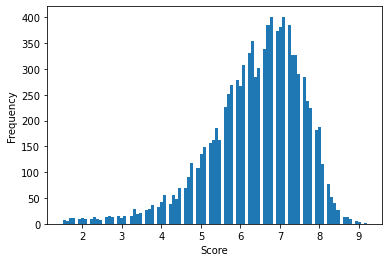

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.score
plt.hist(x, bins=100)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

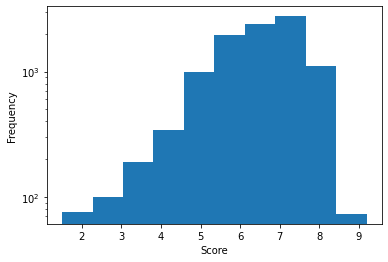

In [96]:
x = df.score
plt.hist(x, bins=10, log= True)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [102]:
#import pywedge as pw
#mc = pw.Pywedge_Charts(df, c="score", y = "year")
#charts = mc.make_charts()

## 5. Determining Best Movies

In [104]:
len(df.groupby("year"))

62

In [105]:
best_movie = df.groupby("year", sort=False)

In [110]:
#based on score in each year
for key, valuedf in best_movie:
    high_score = valuedf[valuedf["score"] == valuedf.score.max()]
    print(high_score)
    break

      imdbID                     title  year  score   votes       genres  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479  Crime|Drama   

   runtime_in_mins  Comedy|Drama  Sport  Drama  ...  Thriller  Western  \
0              142         False  False   True  ...     False    False   

   Animation  Fantasy  Sci-Fi    War  Family  Adventure  Comedy  Film-Noir  
0      False    False   False  False   False      False   False      False  

[1 rows x 32 columns]


In [111]:
#based on votes in each year
for key, valuedf in best_movie:
    high_vote = valuedf[valuedf["votes"] == valuedf.votes.max()]
    print(high_vote)
    break

      imdbID                     title  year  score   votes       genres  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479  Crime|Drama   

   runtime_in_mins  Comedy|Drama  Sport  Drama  ...  Thriller  Western  \
0              142         False  False   True  ...     False    False   

   Animation  Fantasy  Sci-Fi    War  Family  Adventure  Comedy  Film-Noir  
0      False    False   False  False   False      False   False      False  

[1 rows x 32 columns]


## 6. Trends in Popularity of Genres